In [1]:
import numpy as np

In [2]:
class vanillaGrad(object):
    def __init__(self,weight_shape, learning_rate=0.1, loss_function="MSE"):
        self.weights = np.array(np.random.randn(weight_shape), ndmin=2)
        self.lr = learning_rate
        self.loss = loss_function
        self.history = {}

    def update_w(self, X, y):
        """ The default loss function is the preferred Mean Squared error, the other alternative is the MAE"""
        dl_dw = 0
        
        
        N = len(X)
            #looping over all the training data
        for i in range(N):
            x = np.array(X[i], ndmin=2).T
            np.dot(self.weights, x)  

            if self.loss == "MSE":                            
                dl_dw += (-2 *x * (y[i] - np.dot(self.weights, x)))
            else:
                #dl_dw += ((y[i] - np.dot(self.weights, x)) * -x)/(y[i] - np.dot(self.weights, x)) * -1
                #change this later 
                dl_dw += (-2 *x * (y[i] - np.dot(self.weights, x)))
                     
                
        #update the weight matrix
        #dividing by N to average the loss
        self.weights -= 1/N * (self.lr * dl_dw.T)

        return self.weights

    def average_loss(self, X, y):
            X = np.array(X, ndmin=2)
            total_error = 0.0
            N = len(X)
            for i in range(N):
                x = X[i].T
                if self.loss == "MSE":
                    total_error += (y[i] - np.dot(self.weights, x)) **2
                else:
                    total_error += (y[i] - np.dot(self.weights, x)) * -1

            return total_error / N

        
    def train(self, X, y, epochs):
        for epoch in range(epochs):
                w = self.update_w(X, y)
                self.history[epoch] = self.average_loss(X, y)

                print(f"Epoch {epoch} / {epochs}: loss {self.history[epoch]}")

In [164]:
#generating data 
X = np.random.rand(100, 4)
y = []
# y = 2x1 + 3x2
for x in X:
    y.append(2*x[0] + 3*x[1] + x[2] + 0.3*x[3])


In [176]:
network = vanillaGrad(3, 0.1, "MAE")

In [177]:
network.train(X, y, epochs=1000)
network.weights

Epoch 0 / 1000: loss [-3.33149857]
Epoch 1 / 1000: loss [-2.72049222]
Epoch 2 / 1000: loss [-2.22135591]
Epoch 3 / 1000: loss [-1.81361045]
Epoch 4 / 1000: loss [-1.48052559]
Epoch 5 / 1000: loss [-1.2084337]
Epoch 6 / 1000: loss [-0.98616914]
Epoch 7 / 1000: loss [-0.80461025]
Epoch 8 / 1000: loss [-0.65630517]
Epoch 9 / 1000: loss [-0.53516618]
Epoch 10 / 1000: loss [-0.43621997]
Epoch 11 / 1000: loss [-0.35540367]
Epoch 12 / 1000: loss [-0.28939813]
Epoch 13 / 1000: loss [-0.23549182]
Epoch 14 / 1000: loss [-0.19146958]
Epoch 15 / 1000: loss [-0.15552178]
Epoch 16 / 1000: loss [-0.12617003]
Epoch 17 / 1000: loss [-0.1022066]
Epoch 18 / 1000: loss [-0.08264485]
Epoch 19 / 1000: loss [-0.06667874]
Epoch 20 / 1000: loss [-0.05364982]
Epoch 21 / 1000: loss [-0.04302015]
Epoch 22 / 1000: loss [-0.03435028]
Epoch 23 / 1000: loss [-0.02728121]
Epoch 24 / 1000: loss [-0.02151967]
Epoch 25 / 1000: loss [-0.01682605]
Epoch 26 / 1000: loss [-0.01300465]
Epoch 27 / 1000: loss [-0.00989557]
Epoc

array([[1.99999982, 2.99999987, 1.0000003 ]])

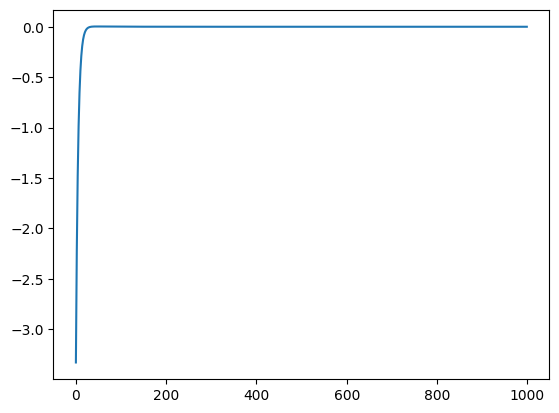

In [178]:
import matplotlib.pyplot as plt 
plt.plot(network.history.keys(), network.history.values())